## Data analysis

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import acf

In [2]:
df_train = pd.read_csv("data/train.csv", dtype={"place_id": object})

# assume time is minute
df_train['hour'] = df_train.time // 60
df_train['day'] = df_train.time // (60*24)
df_train["week"] = df_train.time // (60*24*7)

In [3]:
df_filter = df_train[(df_train['x'] > 1) & (df_train['x'] < 2) & (df_train['y'] > 1)& (df_train['y'] < 2) ]

In [4]:
from collections import Counter
place_counts = Counter(df_train.place_id.values)

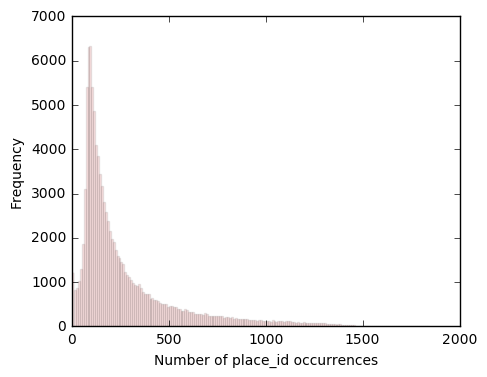

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,4))
bins = np.arange(0, max(list(place_counts.values()))+1, 10)
plt.hist(list(place_counts.values()),
         bins=bins, alpha=0.1, color='r')
plt.xlabel('Number of place_id occurrences')
plt.ylabel('Frequency')
plt.savefig('placeid_count')
plt.show()

In [6]:
# use the place id with the most checkins as an example
checkins_by_place = df_train.place_id.value_counts()
df_sample_place = df_train[df_train.place_id == checkins_by_place.index[0]]

In [7]:
len(checkins_by_place)

108390

In [8]:
def check_acf(counts_by_time):

    # fill in the gap with 0 to create a series with fixed intervals
    time_index = np.arange(
        counts_by_time.index.min(),
        counts_by_time.index.max() + 1)
    count_by_time_filled = counts_by_time.reindex(time_index)
    count_by_time_filled.fillna(0, inplace=True)

    # ACF
    acf_raw = acf(count_by_time_filled)
    
    return acf_raw

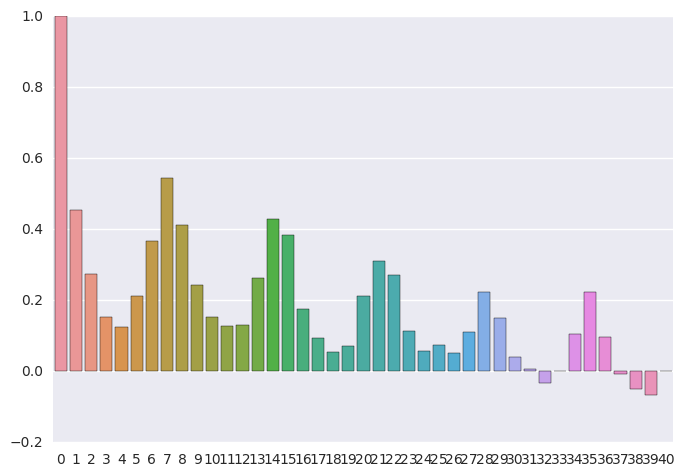

In [12]:
# plot the ACF of "day"
acf_raw = check_acf(df_sample_place.day.value_counts())
sns.barplot(x=np.arange(0, acf_raw.size), y=acf_raw)
sns.plt.savefig("day.png")
sns.plt.show()


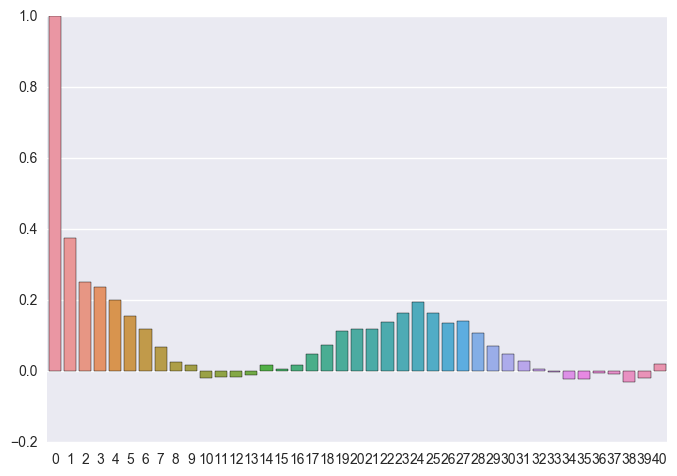

In [28]:
# plot the ACF of hour
acf_raw = check_acf(df_sample_place.hour.value_counts())
sns.barplot(x=np.arange(0, acf_raw.size), y=acf_raw)
sns.plt.savefig("hour.png")
sns.plt.show()